In [1]:
#importing libraries
import tensorflow as tf
from keras import datasets, layers, models
import numpy as np
from sklearn. metrics import confusion_matrix
import seaborn as sns

print(f"Tensorflow Version:{tf.__version__}")

Tensorflow Version:2.19.0


In [2]:
#GPU verification

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu,True)
        print(f"✅ SUccess! GPU Detected:{gpus}")
    except RuntimeError as e:
        print(e)
else:
    print("No GPU Detected.Running On CPU (will take more time)")



✅ SUccess! GPU Detected:[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
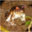

In [3]:
#Loading and Splitting Data
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()

X_train[0]

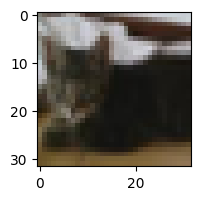

In [4]:
#Selecting an image to display
from matplotlib import pyplot as plt


# 4. Display the image
plt.figure(figsize=(2,2))
plt.imshow(X_train[9])

In [5]:
#Defining Class names for readability
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']


print(f"Training Data Shape:{X_train.shape}\nTest Data Shape:{X_test.shape}")


Training Data Shape:(50000, 32, 32, 3)
Test Data Shape:(10000, 32, 32, 3)


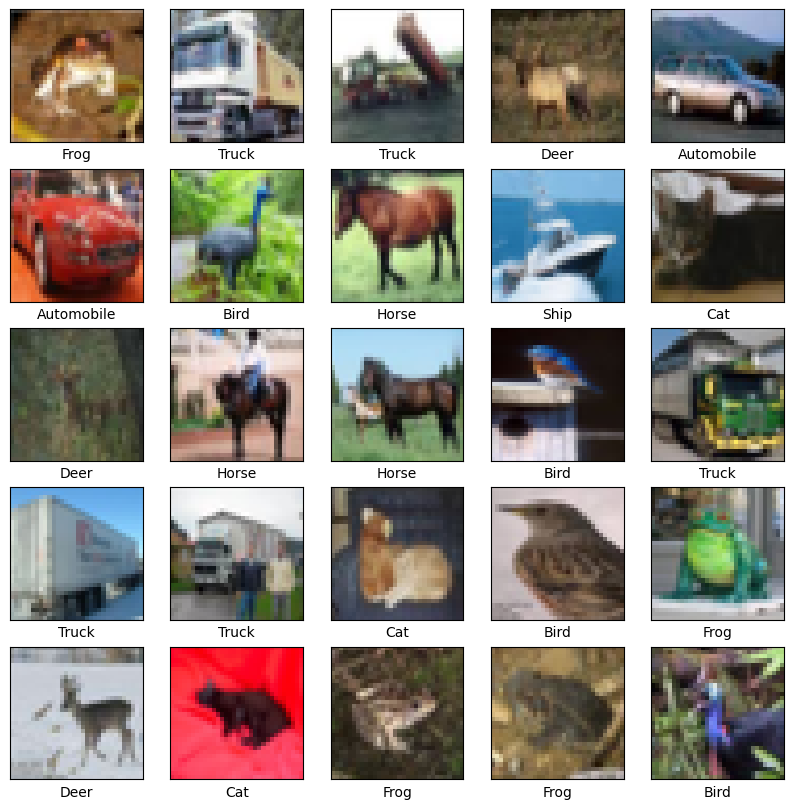

In [6]:
#visualizing data before training
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])

    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [7]:
#Preprocessing and Augmentation

#Normalizing pixel values to be (0,1)
if X_train.max() >1.0:
    X_train = X_train/255.0
    X_test = X_test /255.0
    print(f"✅ Data Normalized to 0-1 range.")
else:
    print(" Data was already normalized. Skipped division.")

print(f"New Max Pixel value:{X_train.max()}")


✅ Data Normalized to 0-1 range.
New Max Pixel value:1.0


In [8]:
#creating a  data augmentation stage for better accuracy
data_augmentation = models.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)

])

In [9]:
print(f"Max pixel value: {X_train.max()}")
print(f"Min pixel value: {X_train.min()}")

Max pixel value: 1.0
Min pixel value: 0.0


In [10]:
#Building CNN Architecture
model = models.Sequential()

#inputlayer
model.add(layers.Input(shape=(32,32,3)))
model.add(data_augmentation)

#cnn block 1
model.add(layers.Conv2D(32,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))

#cnn block 2
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

#cnn block 3
model.add(layers.Conv2D(64,(3,3),activation='relu'))

#Dense Layers
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))


model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
import tensorflow as tf

In [12]:
import keras

initial_learning_rate = 0.001
# Assuming you have 100 epochs, and a certain number of batches per epoch
# Calculate decay_steps based on total training steps (batches * epochs)
decay_steps = 64 * 100

lr_schedule = keras.optimizers.schedules.CosineDecay(
    initial_learning_rate, decay_steps, alpha=0.01 # alpha is the minimum learning rate fraction
)




In [13]:
optimizer = keras.optimizers.Adam(learning_rate=lr_schedule)

In [14]:
#Compiling the model
model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy' ,metrics=["accuracy"] )

In [15]:
#Training the model
history = model.fit(X_train,y_train,epochs =100,validation_data = (X_test,y_test),verbose=2)

Epoch 1/100
1563/1563 - 17s - 11ms/step - accuracy: 0.1289 - loss: 2.3563 - val_accuracy: 0.1308 - val_loss: 2.3026
Epoch 2/100
1563/1563 - 11s - 7ms/step - accuracy: 0.1293 - loss: 2.3026 - val_accuracy: 0.1308 - val_loss: 2.3026
Epoch 3/100
1563/1563 - 11s - 7ms/step - accuracy: 0.1276 - loss: 2.3026 - val_accuracy: 0.1308 - val_loss: 2.3026
Epoch 4/100
1563/1563 - 10s - 6ms/step - accuracy: 0.1282 - loss: 2.3026 - val_accuracy: 0.1308 - val_loss: 2.3026
Epoch 5/100
1563/1563 - 10s - 7ms/step - accuracy: 0.1295 - loss: 2.3026 - val_accuracy: 0.1308 - val_loss: 2.3026
Epoch 6/100
1563/1563 - 11s - 7ms/step - accuracy: 0.1294 - loss: 2.3026 - val_accuracy: 0.1308 - val_loss: 2.3026
Epoch 7/100
1563/1563 - 11s - 7ms/step - accuracy: 0.1283 - loss: 2.3026 - val_accuracy: 0.1308 - val_loss: 2.3026
Epoch 8/100
1563/1563 - 20s - 13ms/step - accuracy: 0.1281 - loss: 2.3026 - val_accuracy: 0.1308 - val_loss: 2.3026
Epoch 9/100
1563/1563 - 11s - 7ms/step - accuracy: 0.1284 - loss: 2.3026 - val

In [16]:
val_accuracy,val_loss = model.evaluate(X_train,y_train)
print(val_accuracy,val_loss)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1296 - loss: 2.3026
2.302555561065674 0.12946000695228577


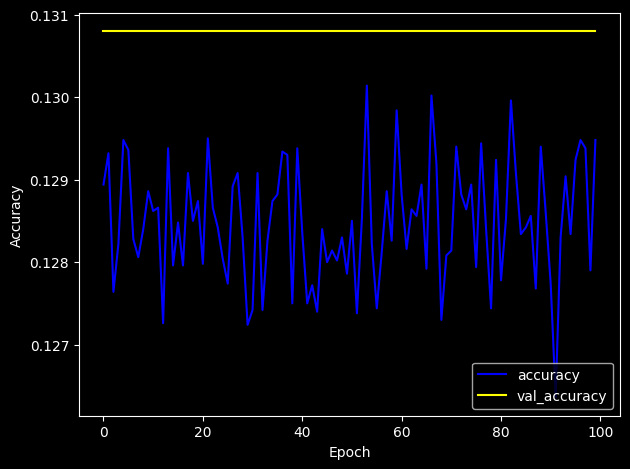

In [18]:
#model Evaluation
plt.plot(history.history['accuracy'],label='accuracy',color='blue')
plt.plot(history.history['val_accuracy'],label='val_accuracy',color='yellow')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.tight_layout()
plt.style.use('dark_background')
plt.show()

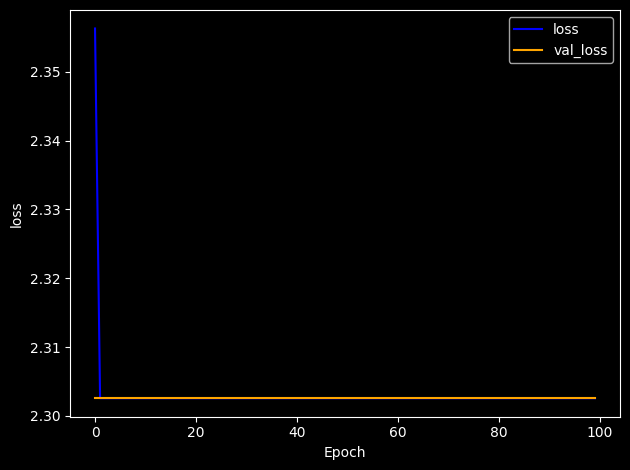

In [19]:
plt.plot(history.history['loss'],label='loss',color='blue')
plt.plot(history.history['val_loss'],label='val_loss',color='orange')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='upper right')
plt.style.use('dark_background')
plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


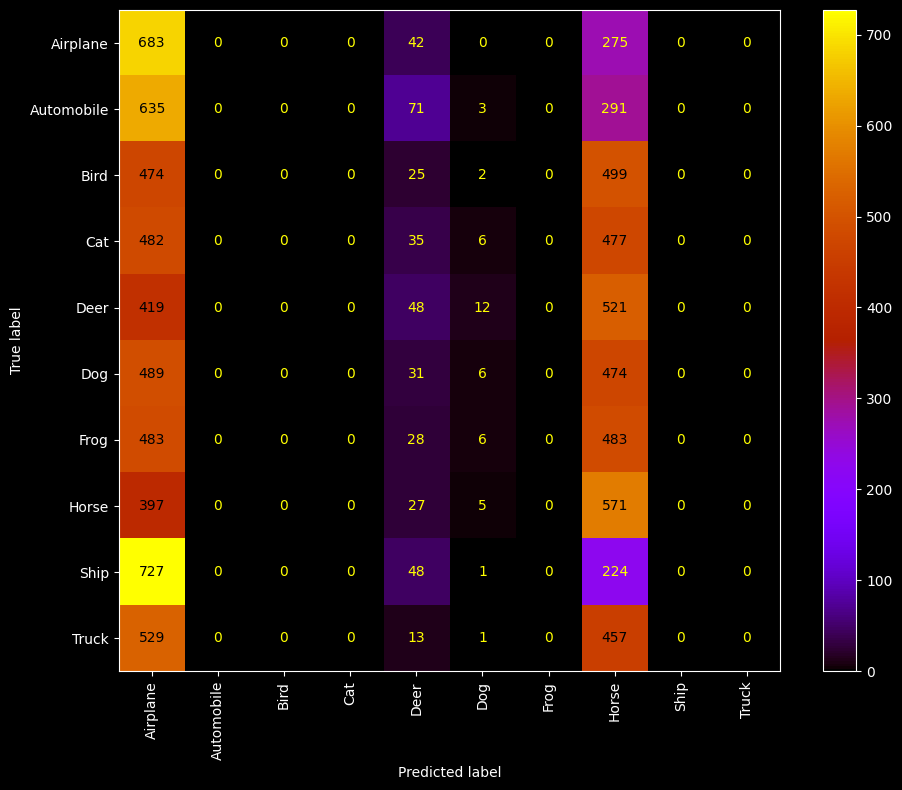

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob,axis=1)
y_true = y_test.flatten()
cm = confusion_matrix(y_true,y_pred)

plt.figure(figsize=(10,8))
disp = ConfusionMatrixDisplay(cm,display_labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck'])
disp.plot(cmap='gnuplot',ax = plt.gca(),xticks_rotation='vertical')
plt.tight_layout()
plt.style.use('dark_background')
plt.show()